###Project Description

In this hands-on project the goal is to build a python code for image classification from scratch to understand the nitty gritties of building and training a model and further to understand the advantages of neural networks. First we will implement a simple KNN classifier and later implement a Neural Network to classify the images in the SVHN dataset. We will compare the computational efficiency and accuracy between the traditional methods and neural networks.   

### Load tensorflow and necessary libraries

In [0]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import h5py
from sklearn.neighbors import KNeighborsClassifier

tf.set_random_seed(42)

In [16]:
tf.__version__

'1.13.1'

### Connect to Google Drive

In [17]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 1. Read the dataset

In [18]:
f = h5py.File('../content/gdrive/My Drive/AIML/Projects/Residency 7/SVHN_single_grey1.h5', 'r')

# List all groups
print("Keys: %s" % list(f.keys()))

Keys: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [0]:
#a_group_key = list(f.keys())[0]

# Get the data
X_test = f.get('X_test')
X_train = f.get('X_train')
X_val = f.get('X_val')
y_test = f.get('y_test')
y_train = f.get('y_train')
y_val = f.get('y_val')

In [20]:
#Print the shape of all the datas available.
print ('X_train Shape: ', X_train.shape)
print ('y_train Shape: ', y_train.shape)
print ('X_val Shape: ', X_val.shape)
print ('y_val Shape: ', y_val.shape)
print ('X_test Shape: ', X_test.shape)
print ('y_test Shape: ', y_test.shape)

X_train Shape:  (42000, 32, 32)
y_train Shape:  (42000,)
X_val Shape:  (60000, 32, 32)
y_val Shape:  (60000,)
X_test Shape:  (18000, 32, 32)
y_test Shape:  (18000,)


In [21]:
# Get the type of the data
X_train

<HDF5 dataset "X_train": shape (42000, 32, 32), type "<f4">

In [0]:
# X_train is a HDF5 dataset. We have to convert it to an array to do fit into algorithms.

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1] * X_val.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [23]:
#Check the resulted array after reshape.
X_train

array([[ 33.0704,  30.2601,  26.852 , ...,  49.6682,  50.853 ,  53.0377],
       [ 86.9591,  87.0685,  88.3735, ...,  75.2206,  76.6396,  79.2865],
       [123.125 , 125.8581, 122.0757, ...,  93.9349, 104.7875, 113.8252],
       ...,
       [154.094 , 155.8057, 156.8164, ..., 135.1328, 136.6596, 137.6595],
       [207.4954, 208.4953, 213.0218, ..., 214.1357, 212.1359, 209.1362],
       [ 95.0784,  96.0783, 100.0779, ..., 138.0803, 140.493 , 140.493 ]],
      dtype=float32)

In [24]:
#Check the target variable
y_train

array([2, 6, 7, ..., 7, 0, 4], dtype=uint8)

### Observations:

#### The provided data is in the HDF5 dataset format.
#### The feature image is in greyscale and 2 dimenstional format.
#### The feature should be converted to 1 dimentional format to predict through algorithmns.
#### With numpy, we have reshaped the 2 dimentional image data to one dimentional array. 

---









### Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points) 

In [33]:
#Lets first verify with k=3
neigh = KNeighborsClassifier(n_neighbors=3,  algorithm = 'brute')
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [34]:
# Find the accuracy score for train data
neigh.score(X_train, y_train)

0.6997142857142857

In [39]:
#Get the accuracy score for test data
neigh.score(X_test, y_test)

0.4617222222222222

In [40]:
#Finding the optimal K
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 3-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm = 'brute')
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())
    print("for k = ",k,", Accuracy = ",cv_scores[-1])

for k =  1 , Accuracy =  0.43121457958711257
for k =  3 , Accuracy =  0.42914315599199626
for k =  5 , Accuracy =  0.46169031177611003
for k =  7 , Accuracy =  0.47161891926554317
for k =  9 , Accuracy =  0.4796902459885706
for k =  11 , Accuracy =  0.48509484992138646
for k =  13 , Accuracy =  0.4865715149475258
for k =  15 , Accuracy =  0.487594916325544
for k =  17 , Accuracy =  0.49071393341762226
for k =  19 , Accuracy =  0.49202350323407246
for k =  21 , Accuracy =  0.4956665543878714
for k =  23 , Accuracy =  0.49592816830173075
for k =  25 , Accuracy =  0.49654722100423343
for k =  27 , Accuracy =  0.5000472976649512
for k =  29 , Accuracy =  0.5007613639838187
for k =  31 , Accuracy =  0.5002855510805319
for k =  33 , Accuracy =  0.5001187568792383
for k =  35 , Accuracy =  0.49999974493402616
for k =  37 , Accuracy =  0.49995203407372074
for k =  39 , Accuracy =  0.49992818374014253
for k =  41 , Accuracy =  0.5006186905494248
for k =  43 , Accuracy =  0.49928544900035227
for

The optimal number of neighbors is 29


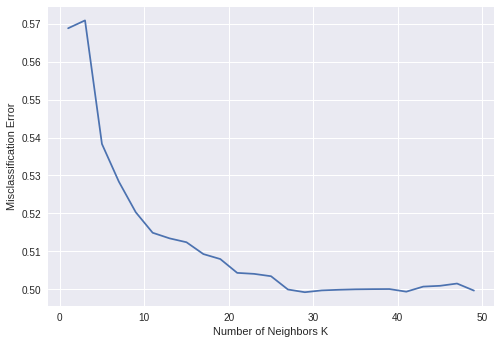

In [50]:
from matplotlib import pyplot as plt
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

lstneighbors = list(filter(lambda x: x % 2 != 0, myList))

# determining best k
optimal_k = lstneighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(lstneighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [51]:
#Lets build the Knn model with optiomal K (29)

neigh = KNeighborsClassifier(n_neighbors=29,  algorithm = 'brute')
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=29, p=2,
           weights='uniform')

In [52]:
# Find the accuracy score for train data
neigh.score(X_train, y_train)

0.6032619047619048

In [53]:
#Get the accuracy score for test data
neigh.score(X_test, y_test)

0.5316666666666666

###Print the classification metric report (2.5 points)

In [0]:
#Get predictions for test data.
predictions = neigh.predict(X_test)

In [112]:
#Print classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
ClassificationReportKnn = classification_report(y_test, predictions)
print(ClassificationReportKnn)

              precision    recall  f1-score   support

           0       0.45      0.70      0.55      1814
           1       0.46      0.73      0.56      1828
           2       0.64      0.53      0.58      1803
           3       0.47      0.43      0.45      1719
           4       0.64      0.65      0.64      1812
           5       0.53      0.40      0.46      1768
           6       0.51      0.42      0.46      1832
           7       0.70      0.63      0.66      1808
           8       0.47      0.36      0.41      1812
           9       0.55      0.44      0.49      1804

   micro avg       0.53      0.53      0.53     18000
   macro avg       0.54      0.53      0.53     18000
weighted avg       0.54      0.53      0.53     18000



### Observations:

#### With k=29, we have got the test accuray as 53.16%.

####With the classification report, the below metrics for each and every class is obtained. Based on this metrics we can compare the sensitivity and specificity of the models

1.   Precision – Accuracy of positive predictions
2.   Recall - Fraction of positives That were correctly identified.
3.   F1 Score - harmonic mean of precision and recall









---



### Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (5 points)

In [0]:
#Convert the target variable to categorical (one hot encoding)
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [58]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [59]:
model.fit(X_train,trainY,          
          validation_data=(X_test,testY),
          epochs=10,
          batch_size=20)

Instructions for updating:
Use tf.cast instead.
Train on 42000 samples, validate on 18000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
42000/42000 [==============================] - 12s 288us/sample - loss: 0.1801 - acc: 0.0997 - val_loss: 0.1799 - val_acc: 0.1007
Epoch 2/10
42000/42000 [==============================] - 11s 273us/sample - loss: 0.1801 - acc: 0.0997 - val_loss: 0.1799 - val_acc: 0.1007
Epoch 3/10
42000/42000 [==============================] - 12s 285us/sample - loss: 0.1801 - acc: 0.0997 - val_loss: 0.1799 - val_acc: 0.1007
Epoch 4/10
42000/42000 [==============================] - 11s 270us/sample - loss: 0.1801 - acc: 0.0997 - val_loss: 0.1799 - val_acc: 0.1007
Epoch 5/10
42000/42000 [==============================] - 12s 275us/sample - loss: 0.1801 - acc: 0.0997 - val_loss: 0.1799 - val_acc: 0.1007
Epoch 6/10
42000/42000 [==============================] - 12s 278us/sample - loss: 0.1801 - acc: 0.0997 - val_loss: 0.1799 - val_acc: 0.1007
Epoch 7/

### Observations:

#### The accuracy is very low, we can try implementing the other backpropagation techniques.



---



### Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)

In [0]:
#Initialize Sequential model
model1 = tf.keras.models.Sequential()

#Add 1st hidden layer
model1.add(tf.keras.layers.Dense(200, activation='relu'))

#Add 2nd hidden layer
model1.add(tf.keras.layers.Dense(100, activation='relu'))

#Add OUTPUT layer
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model1.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
model1.fit(X_train,trainY,          
          validation_data=(X_test,testY),
          epochs=10,
          batch_size=20)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 10s 234us/sample - loss: 14.5078 - acc: 0.0999 - val_loss: 14.5036 - val_acc: 0.1002
Epoch 2/10
42000/42000 [==============================] - 9s 226us/sample - loss: 14.5074 - acc: 0.0999 - val_loss: 14.5036 - val_acc: 0.1002
Epoch 3/10
42000/42000 [==============================] - 9s 223us/sample - loss: 14.5074 - acc: 0.0999 - val_loss: 14.5036 - val_acc: 0.1002
Epoch 4/10
42000/42000 [==============================] - 9s 225us/sample - loss: 14.5074 - acc: 0.0999 - val_loss: 14.5036 - val_acc: 0.1002
Epoch 5/10
42000/42000 [==============================] - 10s 236us/sample - loss: 14.5074 - acc: 0.0999 - val_loss: 14.5036 - val_acc: 0.1002
Epoch 6/10
42000/42000 [==============================] - 10s 237us/sample - loss: 14.5074 - acc: 0.0999 - val_loss: 14.5036 - val_acc: 0.1002
Epoch 7/10
42000/42000 [==============================] - 9s 225us/sample - loss: 14.5074 - acc

###Observations:
#### Even with SGD, the accuray of the model is not increased.
#### Lets implement bacthnormalization 

###Implement batch normalization for training the neural network (2.5 points)

In [0]:
#Initialize Sequential model
model2 = tf.keras.models.Sequential()

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model2.add(tf.keras.layers.Dense(200, activation='relu'))

#Add 2nd hidden layer
model2.add(tf.keras.layers.Dense(100, activation='relu'))

#Add OUTPUT layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model2.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
model2.fit(X_train,trainY,          
          validation_data=(X_test,testY),
          epochs=32,
          batch_size=20)

Train on 42000 samples, validate on 18000 samples
Epoch 1/32
42000/42000 [==============================] - 11s 262us/sample - loss: 1.3807 - acc: 0.5441 - val_loss: 0.9240 - val_acc: 0.7162
Epoch 2/32
42000/42000 [==============================] - 11s 253us/sample - loss: 0.9877 - acc: 0.6879 - val_loss: 0.8015 - val_acc: 0.7571
Epoch 3/32
42000/42000 [==============================] - 11s 252us/sample - loss: 0.8862 - acc: 0.7218 - val_loss: 0.7662 - val_acc: 0.7726
Epoch 4/32
42000/42000 [==============================] - 11s 252us/sample - loss: 0.8170 - acc: 0.7401 - val_loss: 0.7063 - val_acc: 0.7934
Epoch 5/32
42000/42000 [==============================] - 11s 252us/sample - loss: 0.7720 - acc: 0.7565 - val_loss: 0.6570 - val_acc: 0.8096
Epoch 6/32
42000/42000 [==============================] - 11s 251us/sample - loss: 0.7414 - acc: 0.7659 - val_loss: 0.6545 - val_acc: 0.8109
Epoch 7/32
42000/42000 [==============================] - 11s 252us/sample - loss: 0.7105 - acc: 0.7733 

In [0]:
predictionsNN = model2.predict(X_test)

In [88]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
ClassificationReportNN = classification_report(testY.argmax(axis=1), predictionsNN.argmax(axis=1))
print(ClassificationReportNN)

              precision    recall  f1-score   support

           0       0.78      0.92      0.85      1814
           1       0.82      0.87      0.85      1828
           2       0.89      0.85      0.87      1803
           3       0.80      0.77      0.79      1719
           4       0.84      0.90      0.87      1812
           5       0.83      0.84      0.84      1768
           6       0.88      0.80      0.84      1832
           7       0.88      0.87      0.87      1808
           8       0.87      0.78      0.82      1812
           9       0.85      0.82      0.84      1804

   micro avg       0.84      0.84      0.84     18000
   macro avg       0.85      0.84      0.84     18000
weighted avg       0.85      0.84      0.84     18000



### Observations:

#### After batch normalization, the model is performing better. 
#### Still the model can be improved optimizing dropouts and learning rates.




---



###Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics (5 points) 

In [0]:
#Plot the classification report for visualization

import itertools

def plot_classification_report(classificationReport,
                               title='Classification report',
                               cmap='RdBu'):

    classificationReport = classificationReport.replace('\n\n', '\n')
    classificationReport = classificationReport.replace(' / ', '/')
    lines = classificationReport.split('\n')

    classes, plotMat, support, class_names = [], [], [], []
    for line in lines[1:-4]:  # if you don't want avg/total result, then change [1:] into [1:-1]
        t = line.strip().split()
        if len(t) < 2:
            continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)

    plotMat = np.array(plotMat)
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup)
                   for idx, sup in enumerate(support)]

    plt.imshow(plotMat, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    plt.xticks(np.arange(3), xticklabels, rotation=45)
    plt.yticks(np.arange(len(classes)), yticklabels)

    upper_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 8
    lower_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 2
    for i, j in itertools.product(range(plotMat.shape[0]), range(plotMat.shape[1])):
        plt.text(j, i, format(plotMat[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if (plotMat[i, j] > upper_thresh or plotMat[i, j] < lower_thresh) else "black")

    plt.ylabel('Metrics')
    plt.xlabel('Classes')
    plt.tight_layout()


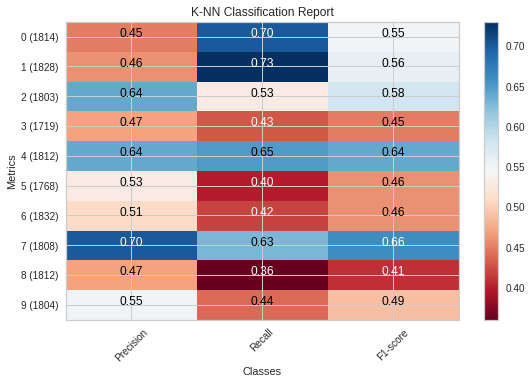

In [113]:
plot_classification_report(ClassificationReportKnn, "K-NN Classification Report")
plt.show()

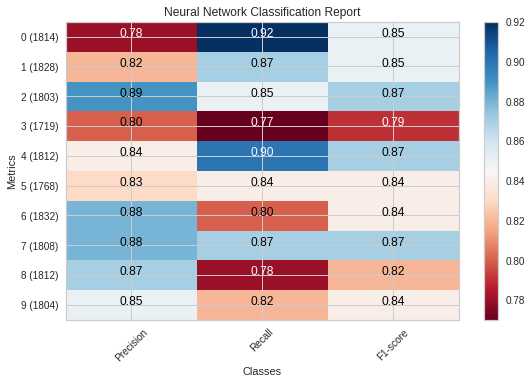

In [111]:
plot_classification_report(ClassificationReportNN, "Neural Network Classification Report")
plt.show()

### Observations:

#### The computational time for Knn is higher than the Deep Neural Network while predicting.
#### Deep Neural Network is data hungry. DNN yields better results with more data. As we see here in classification report, we have utmost equally distributed data in all the classes. So DNN learns the each class better and yields better results.
#### With K-NN as the learning happens during prediction, the distribution of training data across classes does not matter. It is evident with the widely varying precision score between classes irrespective of at most equally distributed training data across classes.
#### K-NN accuracy depends on the K value. For any given training set, the best choice for K would be the one striking the optimal trade-off between bias and variance. 
#### DNN generalizes well, while K-NN tend to memorize
#### Depends on the data/business problem we are dealing with, we have to make tradeoff between sensitivity (Recall) and specificity.

